Training E_MRS:  3.1040714907034137
Testing E_MRS:  3.0729137974693463


/tmp/ipykernel_12141/2839665588.py:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mse_1 = math.sqrt(mse[EPOCH-1]/576)


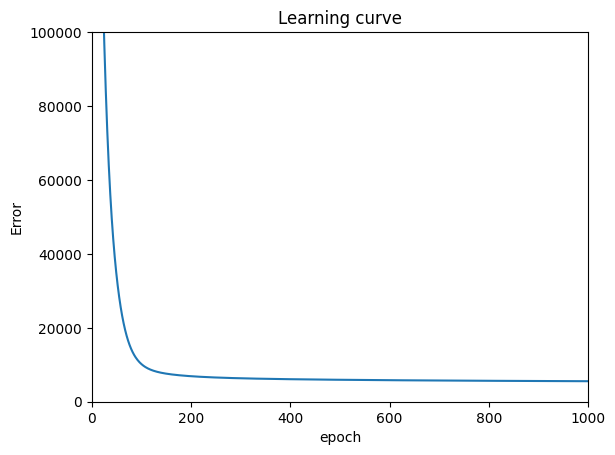

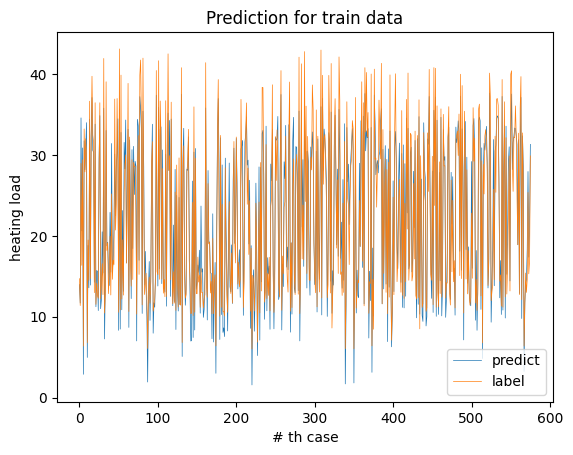

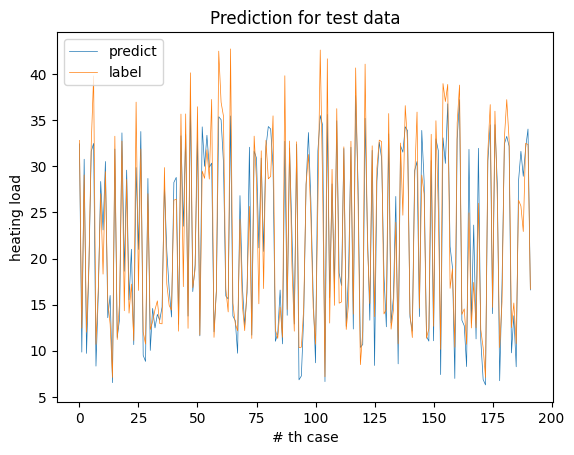

In [1]:
from calendar import EPOCH
from pickle import TRUE
from re import T
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import math

def standardization(data):
    mu = np.mean(data,axis=0)
    sigma = np.std(data,axis=0)
    return (data-mu)/sigma

EPOCH = 1000
learning_rate = 0.000001

df = pd.read_csv('2024_energy_efficiency_data.csv')

test1 = pd.get_dummies(df['Orientation'],prefix='Orientation')
test2 = pd.get_dummies(df['Glazing Area Distribution'],prefix='Glazing Area Distribution')
df= df.drop(labels='Orientation',axis=1)
df= df.drop(labels='Glazing Area Distribution',axis=1)
df= df.drop(labels='Cooling Load',axis=1)
df=pd.concat([test1,df],axis=1)
df=pd.concat([test2,df],axis=1)
df=shuffle(df)
train,test = train_test_split(df, test_size=0.25, random_state=1)
train = train.values
test = test.values
X_train = np.delete(train,16,axis=1)
X_test = np.delete(test,16,axis=1)
Y_train = train[:,16].reshape(576,1)
Y_test = test[:,16].reshape(192,1)
N = len(Y_train)
results = pd.DataFrame(columns=["mse"])

X_train[:,10] = standardization(X_train[:,10])
X_train[:,11] = standardization(X_train[:,11])
X_train[:,12] = standardization(X_train[:,12])
X_train[:,13] = standardization(X_train[:,13])
X_train[:,14] = standardization(X_train[:,14])
X_train[:,15] = standardization(X_train[:,15])
X_test[:,10] = standardization(X_test[:,10])
X_test[:,11] = standardization(X_test[:,11])
X_test[:,12] = standardization(X_test[:,12])
X_test[:,13] = standardization(X_test[:,13])
X_test[:,14] = standardization(X_test[:,14])
X_test[:,15] = standardization(X_test[:,15])
np.random.seed(0)
W1=np.random.randint(-1, 1, size=(16,10))
W2=np.random.randint(-1, 1, size=(10,1))
"""
plot_t_Etotal = np.empty(shape=EPOCH)
plot_tr_pre = np.empty(shape=576)
plot_te_pre = np.empty(shape=192)
plot_tr_lab = np.empty(shape=576)
plot_te_lab = np.empty(shape=192)
"""
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def sum_of_square_error(y_pred, y_true):
    X = (y_true - y_pred)**2
    
    return np.sum(X)

def sigmoid_backward(dA, Z):
   sig = sigmoid(Z)
   return dA * sig * (1 - sig)

#np.savetxt('temp.txt',X_train.shape,delimiter=',')
#with open('temp.txt', 'w') as f:
#    f.write(str(W1.shape))
mse = np.empty([EPOCH,1])
#"""
for i in range(EPOCH):

    Z1 = np.dot(X_train, W1)
    Z2 = np.dot(Z1, W2)
    mse[i] = sum_of_square_error(Z2, Y_train)

    #print(mse[i])
    
    results=results._append({"mse":mse},ignore_index=True )
        
    # Backpropagation phase
    E1 = 2*(Z2 - Y_train)
    dW1 = E1
    E2 = np.dot(dW1, W2.T)
    dW2 = E2
    
    # Updating the weights
    W2_update = np.dot(Z1.T, dW1) 
    W1_update = np.dot(X_train.T, dW2) 

    
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update
plot_tr_pre = Z2
plot_tr_lab = Y_train
A1=np.dot(X_test,W1)
A2=np.dot(A1,W2)
plot_te_pre=A2
plot_te_lab=Y_test

mse_1 = math.sqrt(mse[EPOCH-1]/576)
mse_ =  (Y_test - A2)**2
mse_2 = math.sqrt(np.sum(mse_)/192)

print("Training E_MRS: ", mse_1)
print("Testing E_MRS: ", mse_2)



#plot learning curve
num = np.arange(0,EPOCH)

plt.ylim(0,100000)
plt.xlim(0,EPOCH)
plt.xlabel('epoch')
plt.ylabel('Error')
plt.plot(num,mse)
plt.title("Learning curve")
plt.show()

#plot prediction for train data

num1 = np.arange(0,576)

plt.xlabel('# th case')
plt.ylabel('heating load')
plt.plot(num1,plot_tr_pre , label = "predict",linewidth='0.5')
plt.plot(num1,plot_tr_lab , label = "label",linewidth='0.5')
plt.title("Prediction for train data")
plt.legend()
plt.show()

#plot prediction for test data

git rm --cached -r .venv/
git rm --cached -r .vscode/
